# Image Segmentation
- Image Segmentation이란?
- 구현

### Image Segmentation이란?
- Image Segmentation은 이미지를 비슷한 특성을 가진 영역으로 나누는 컴퓨터 비전 작업이다. 이미지 세그멘테이션 기술을 여러가지가 있지만 현제 가장 효과적이고 최신 기술은 딥러닝과 합성곱 신경망을 포함한 기술이다.
  - Instance or Semantic Segmentation으로 나뉘어진다.
    - Instance Segmentation: 같은 클래스에 속한 객체라도 물체가 다르면 각각의 클래스로 분류한다.
    - Semantic Segmentation: 같은 클래스에 속한 객체는 같은 클래스로 분류한다.
      - 각각의 사람들을 instance는 개개인으로 분류하고 semantic은 사람으로 분류한다.
    - Mask R-CNN: 다양한 신경망 아키택쳐(R-CNN,Fast R-CNN, Faster R-CNN)의 특징들을 결합하여 이미지 세그멘테이션 기술에 적합하게 설계된 신경망이다.
      - Mast R-CNN 논문: https://arxiv.org/abs/1703.06870
      - R-CNN: 4단계의 프로세스로 이미지 입력 - 객체가 존재하는곳에 이미지 영역 추출(후보 경계상자) - 각 후보 경계 상자에서 특성 추출(CNN사용) - 클래스 분류
- 이미지 세그멘테이션은 객체 감지와 비슷하지만 객체 감지보다 업그레이드 된 기술로서 객체의 정보가 더 필요할 때 사용한다.
  - 객체 감지는 이미지 분류와 경계 박스를 제공하지만 감지된 객체에 관한 상세한 정보(객체의 정확한 형태)를 이미지 세그멘테이션이 제공한다.
- 활용 분야: 자율 주행, 위성 이미지 처리,의학(뇌 종양 검출),회로판 결함 탐

### Downloading the repository

In [1]:
# Mask R-CNN 신경망 사용하기
!git clone https://github.com/alsombra/Mask_RCNN-TF2  # updated repository

fatal: destination path 'Mask_RCNN-TF2' already exists and is not an empty directory.


In [2]:
%cd Mask_RCNN-TF2

/content/Mask_RCNN-TF2


In [3]:
pwd

'/content/Mask_RCNN-TF2'

In [4]:
# 필요한 패키지 설치하기
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1


In [5]:
# mask R-CNN 파일에 있는 setup파일 설치 후 모델 사용하기(컴파일)
!python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separ

In [6]:
%cd ..

/content


In [7]:
pwd

'/content'

In [8]:
# Mask R-CNN을 사용하기 위해 지원하는 tf버전을 사용해야한다.
!pip install numpy==1.23.1

  Using cached numpy-1.23.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.1 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.1 which is incompatible.


In [9]:
import os
import sys
import cv2
import numpy as np
import skimage.io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [10]:
np.__version__

'1.23.1'

In [11]:
import tensorflow as tf

In [12]:
tf.__version__

'2.15.0'

In [13]:
# 경로 가져오기
ROOT_DIR = os.path.abspath('./Mask_RCNN-TF2')
sys.path.append(ROOT_DIR)

Mask_RCNN폴더안에 여러개의 패키지 폴더들이있다.
그중에서 mrcnn패키지를 사용할것인데 utils에는 경계상자, visualize는 시각화 model에는 mask R-CNN 신경망 구조에 대한 모든것이 다 들어가 있다.
이러한 기술들이 모두 활용되고 있는 것이 이미지 세그멘테이션이기 때문에 이미지 세그멘테이션을 하나씩 공부하기엔 너무나 많은 시간과 노력이 필요하다.

In [14]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2']

In [15]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

In [16]:
# sys.path에 다른 폴더를 연결한다 -> coco data set을 연결한다(Mask_RCNN/samples/coco/)
# coco dataset은 이미지넷과 다르게 1000개의 객체를 분류하는게아닌 서로다른 80개의 객체만 분류할수있다
# https://cocodataset.org/#home
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))

In [17]:
sys.path # samples/coco 경로가 추가되었다 -> import coco가능

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2',
 '/',
 '/content/Mask_RCNN-TF2/samples/coco/']

In [18]:
import coco

In [19]:
# ROOT_DIR('./Mask_RCNN-TF2')폴더엔 logs폴더가 없다. 따라서 따로 생성해서 데이터를 저장할 수 있도록 한다.
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
# logs폴더와 달리 Mask_RCNN-TF2폴더안에 images폴더는 존재한다. 따라서 검증을 수행할 여러 이미지가 있는 폴더를 연결하여 활용한다.
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')

In [20]:
MODEL_DIR, IMAGE_DIR

('/content/Mask_RCNN-TF2/logs', '/content/Mask_RCNN-TF2/images')

### Loading the pre-trained neural network

In [21]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')

In [22]:
# utils패키지에서 제공하고 있는 가중치 파일을 다운로드하여 COCO_MODEL_PATH경로에 생성한다.
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [24]:
# 부모 클래스를 coco패키지의 CocoConfig클래스로 상속받았다.
# coco model을 사용할 수 있도록 신경망 구조를 부모 클래스에서 받아온다.
class InferenceConfig(coco.CocoConfig):
  # 구글 colab을 사용할때 GPU를 한개만 준다 -> 따라서 1개로 하지만 본인 컴퓨터라면 GPU 여러개로 해도 상관없다.
  GPT_COUNT = 1
  # 배치 크기와 비슷한 역할로 가중치를 업데이트할때 신경망에 전송해야 하는 이미지의 수이다.
  # 우리는 기존에 학습된 가중치를 적용할것이기 때문에 하나의 이미지만 신경망에 전송하면 된다.
  IMAGES_PER_GPU = 1

In [25]:
config = InferenceConfig()

In [26]:
# 생성된 모델 정보를 보여준다 -> 아키택쳐 resnet등등
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPT_COUNT                      1
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE      

In [29]:
# mrcnn/model.py에 1817줄에 MaskRCNN클래스에 대한 명세가 적혀있다
# mode는 training, inference가 있는데 inference는 해당 모델은 학습하지 않고 예측만 위해 사용하겠다는 것이다
# model_dir은 로그를 저장할 경로를 나타낸다. config는 신경망 구조를 정의한다.
network = modellib.MaskRCNN(mode = 'inference',model_dir=MODEL_DIR, config = config)

Instructions for updating:
Use fn_output_signature instead


In [30]:
# 생성된 모델에 사전에 학습된 가중치를 적용 (by_name은 가중치를 맵핑할때 레이어 이름을 기준으로 매핑한다.)
# 원래는 구조가 동일하기 때문에 순서대로 적용해도 맵핑이 가능하지만 우리는 다른 모델에 가중치를 매핑하기 때문에 이름으로 매핑하여야 한다.
network.load_weights(COCO_MODEL_PATH, by_name=True)

### Detecting objects
- 객체를 탐지할때 사물,사람을 탐지하는것 뿐만아니라 배경도 탐지한다. 따라서 배경 부분을 제외하면 이미지 세그멘테이션을 할수있다.

In [33]:
# coco dataset을 활용하여 학습된 모델들이 분류할 클래스 리스트(BG는 배)
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [34]:
len(class_names)

81

In [35]:
class_names[1], class_names.index('person')

('person', 1)

##### cv2.imread와 skimage.io.imread의 차이점
- cv2는 BGR로 이미지를 읽어오지만 skimage는 RGB로 이미지를 읽어온다. 따라서 필요한 형식에 맞춰 사용하면 된다.
  - 자세히 보면 두 이미지에 색감차이가 있다.

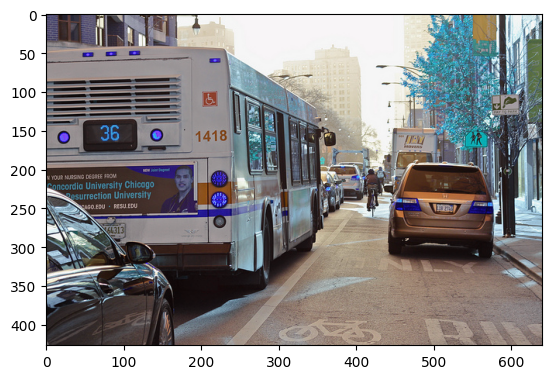

In [41]:
image2 = cv2.imread('/content/Mask_RCNN-TF2/images/8239308689_efa6c11b08_z.jpg')
plt.imshow(image2);

In [38]:
# 예시 이미지 데이터 가져오기
image = skimage.io.imread('/content/Mask_RCNN-TF2/images/8239308689_efa6c11b08_z.jpg')

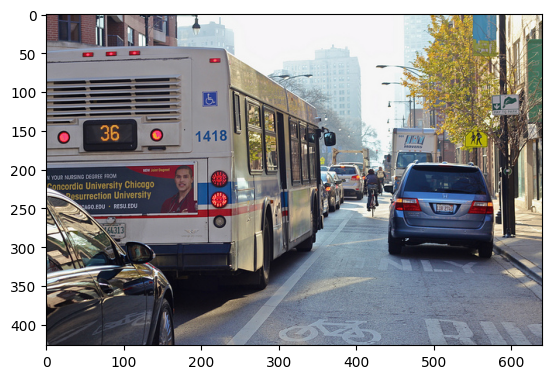

In [39]:
plt.imshow(image);

In [42]:
# 탐지 실행
results = network.detect([image], verbose = 0)
results

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[{'rois': array([[426,   5, 427,   8],
         [  0, 602,   1, 603],
         [  0, 603,   1, 605],
         [  0, 581,   1, 582],
         [174, 121, 247, 129],
         [426, 598, 427, 602],
         [426, 611, 427, 613],
         [426, 611, 427, 612],
         [426, 611, 427, 612],
         [426, 615, 427, 617],
         [  0, 621,   1, 622],
         [ 48, 595,  50, 598],
         [426, 591, 427, 603],
         [426, 594, 427, 602],
         [426, 593, 427, 603],
         [426, 599, 427, 604],
         [426, 600, 427, 603],
         [426, 593, 427, 602],
         [426, 594, 427, 601],
         [426,  36, 427,  38],
         [426,  31, 427,  33],
         [426, 594, 427, 596],
         [426, 599, 427, 601],
         [426, 606, 427, 607],
         [426, 592, 427, 593],
         [426, 594, 427, 595],
         [426, 594, 427, 596],
         [426, 601, 427, 603],
         [ 46,  37, 160,  84],
         [426, 431, 427, 432],
         [426, 603, 427, 609],
         [426, 601, 427, 611],
